<a href="https://colab.research.google.com/github/H1103/Project-115-Logistic-Regression/blob/main/Project_115_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
datatoload = files.upload()

Saving escape_velocity.csv to escape_velocity.csv


In [ ]:
# scatter plot
import plotly.express as px
import pandas as pd
import csv

df = pd.read_csv("escape_velocity.csv")

velocity  = df["Velocity"].tolist()
escaped = df["Escaped"].tolist()

fig = px.scatter(x = velocity, y = escaped)
fig.show()

In [ ]:
import numpy as np

velocity_array = np.array(velocity)
escaped_array = np.array(escaped)

m,c = np.polyfit(velocity_array, escaped_array, 1)
y = []

for x in velocity:
  y_value = m*x + c 
  y.append(y_value)

fig = px.scatter(x = velocity_array, y = escaped_array)
fig.update_layout(shapes = [dict(type = 'line', y0 = min(y), y1 = max(y), x0 = min(velocity_array), x1 = max(velocity_array))])
fig.show()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



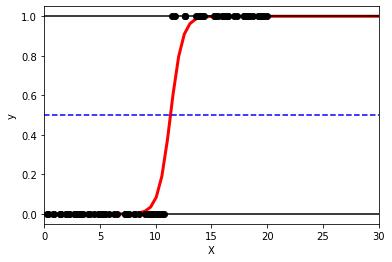

11.557788944723617


In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# reshaping the array using the reshape function from a 3 by 3 matrix into a single array
X = np.reshape(velocity, (len(velocity),1))
Y = np.reshape(escaped, (len(escaped),1))

# using logistic regression to fit the data into the model
lr = LogisticRegression()
lr.fit(X,Y)

# creating a scatter plot
plt.figure()
plt.scatter(X.ravel(), Y, color = "black", zorder = 20)

# defining the sigmoid function to predict the probability as output
def model(x):
  return 1/(1 + np.exp(-x))

# using the linsespace function to create a line
X_test = np.linspace(0,100,200)
chances = model(X_test*lr.coef_+lr.intercept_).ravel()

# plotting the plot with different colors
# we will be using axhline
plt.plot(X_test, chances, color = "red", linewidth = 3)
plt.axhline(y = 0, color = 'k', linestyle = '-')
plt.axhline(y = 1, color = "k", linestyle = '-' )
plt.axhline(y = 0.5, color = "b", linestyle = '--')

# do hit and trial by changing the value of X_test
plt.axvline(x = X_test[165], color = 'b', linestyle = '--')
plt.ylabel('y')
plt.xlabel('X')
plt.xlim(0,30)
plt.show()
print(X_test[23])

In [ ]:
velocity = float(input("Enter the velocity:"))
escaped = model(velocity*lr.coef_+lr.intercept_).ravel()[0]

if escaped <= 0.01:
  print("The object will not escape the orbit.")
elif escaped >= 1:
  print("The object will escape the orbit.")
elif escaped <= 0.5:
  print("The object might not escape the orbit")
else:
  print("The object might escape the orbit.")


Enter the velocity:12
The object might escape the orbit.


## Conclusion
the minimum escaped velocity needed is 11.557788944723617. The object might escape the orbit.